# Part 1: Create Toronto Neighbourhoods

### Import Pandas and wikipedia resources

In [81]:
!conda install -c conda-forge wikipedia -y

import pandas as pd
import wikipedia as wp

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - wikipedia


The following packages will be UPDATED:

  certifi              pkgs/main::certifi-2018.11.29-py36_0 --> conda-forge::certifi-2018.11.29-py36_1000
  openssl              pkgs/main::openssl-1.1.1a-h7b6447c_0 --> conda-forge::openssl-1.1.1a-h14c3975_1000

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2018.12.5-0 --> conda-forge::ca-certificates-2018.11.29-ha4d7672_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


### Read table from wikipedia using webscraping

In [82]:
#Get the html source
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html)[0]
df.to_csv('beautifulsoup_pandas.csv',header=0,index=False)
#print (df)

### Create and visualise dataframe with appropriate column headers

In [83]:
column_names= ['Postcode', 'Borough', 'Neighbourhood']
df = pd.read_csv("beautifulsoup_pandas.csv", names = column_names)
df=df.drop(df.index[0])
df=df.reset_index()
df=df.drop('index', axis=1)
#df.head()

### Visualise dataframe shape

In [84]:
df.shape

(289, 3)

In [85]:
df=df[df.Borough != 'Not assigned']
#df

### Aggregate Neighbourhoods

In [86]:
df=df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()

df.shape

(103, 3)

# Part 2: Geographical (Lat/Long) data

### Import Geographical data and create new dataframe

In [87]:
geo_column_names= ['Postcode', 'Latitude', 'Longitude']
df_geo = pd.read_csv('https://cocl.us/Geospatial_data', names = geo_column_names)
df_geo=df_geo.drop(df.index[0])
df_geo=df_geo.reset_index()
df_geo=df_geo.drop('index', axis=1)
#df_geo

### Merge dataframes on 'Postcode'

In [88]:
df_merged = pd.merge(df, df_geo, on='Postcode')
#df_merged

### Visualise shape of merged dataframe

In [89]:
df_merged.shape

(103, 5)

# Part 3: Investigation of geographical area and import of map tools

### Import necessary modules for maps and analysis

In [90]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Convert to float64 (Error was caused in map creation below as Lat/Long were still objects)

In [91]:
# Convert to float64 (Error was caused below as Lat/Long were still objects)
df_merged["Latitude"] = pd.to_numeric(df_merged["Latitude"])
df_merged["Longitude"] = pd.to_numeric(df_merged["Longitude"])
df_merged.dtypes

Postcode          object
Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object

### Get co-ordinates of Toronto

In [92]:
address = 'Toronto, CN'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Toronto are 43.6425637, -79.3870871832047.


### Create map using merged dataframes and aggregated neighbourhoods

# 4 Import Data from FourSquare

In [93]:
CLIENT_ID = 'EZI3WR2IYDUNYPQU2JSZYU51SN4PVZ5VBOIURYJZ2RL5SSGU' # your Foursquare ID
CLIENT_SECRET = 'ROVL0QPROWJPWNKENQF5LXUK1L20VZCRUBWZTRY3FKMHVMKT' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZI3WR2IYDUNYPQU2JSZYU51SN4PVZ5VBOIURYJZ2RL5SSGU
CLIENT_SECRET:ROVL0QPROWJPWNKENQF5LXUK1L20VZCRUBWZTRY3FKMHVMKT


In [94]:
address = 'Toronto, CN'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Toronto are 43.6425637, -79.3870871832047.


In [95]:
df_merged.loc[0, 'Postcode']

'M1B'

In [96]:
postcode_latitude = df_merged.loc[0, 'Latitude'] # neighborhood latitude value
postcode_longitude = df_merged.loc[0, 'Longitude'] # neighborhood longitude value

postcode_name = df_merged.loc[0, 'Postcode'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(postcode_name, 
                                                               postcode_latitude, 
                                                               postcode_longitude))

Latitude and longitude values of M1B are 43.806686299999996, -79.19435340000001.


### Retrieve data from FourSquare, limiting to food venues (categoryID = 4d4b7105d754a06374d81259)

In [97]:
search_query = 'venues'
Limit = 100
radius = 500
#categoryId = '4d4b7105d754a06374d81259'
print(search_query + ' .... OK!')

venues .... OK!


In [98]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    postcode_latitude, 
    postcode_longitude, 
    radius,
    Limit,)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=EZI3WR2IYDUNYPQU2JSZYU51SN4PVZ5VBOIURYJZ2RL5SSGU&client_secret=ROVL0QPROWJPWNKENQF5LXUK1L20VZCRUBWZTRY3FKMHVMKT&v=20180604&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [99]:
#Send the GET Request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c52ed514c1f6744eaff0569'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

### Get venue details

In [100]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [101]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy's,Fast Food Restaurant,43.807448,-79.199056


### Combine venue and neighbourhood co-ordinates

In [102]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [103]:
toronto_venues = getNearbyVenues(names=df_merged['Postcode'],
                                   latitudes=df_merged['Latitude'],
                                   longitudes=df_merged['Longitude'])

M1B
M1C
M1E
M1G
M1H
M1J
M1K
M1L
M1M
M1N
M1P
M1R
M1S
M1T
M1V
M1W
M1X
M2H
M2J
M2K
M2L
M2M
M2N
M2P
M2R
M3A
M3B
M3C
M3H
M3J
M3K
M3L
M3M
M3N
M4A
M4B
M4C
M4E
M4G
M4H
M4J
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5M
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6A
M6B
M6C
M6E
M6G
M6H
M6J
M6K
M6L
M6M
M6N
M6P
M6R
M6S
M7A
M7R
M7Y
M8V
M8W
M8X
M8Y
M8Z
M9A
M9B
M9C
M9L
M9M
M9N
M9P
M9R
M9V
M9W


### View the final dataframe

In [104]:
print(toronto_venues.shape)
#toronto_venues.head(30)

(2250, 7)


# 5 DBSCAN CLUSTERING

### Import necessary tools and modules

In [105]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
!conda install shapely -y
from shapely.geometry import MultiPoint

print('All Done')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - shapely


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2018.11.~ --> pkgs/main::ca-certificates-2018.12.5-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2018.11.29-py36_~ --> pkgs/main::certifi-2018.11.29-py36_0
  openssl            conda-forge::openssl-1.1.1a-h14c3975_~ --> pkgs/main::openssl-1.1.1a-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
All Done


### Convert venue co-ordinates to float64 (so they can be read by scatter chart code)

In [106]:
# Convert to float64 (Error was caused below as Lat/Long were still objects)
toronto_venues["Venue Latitude"] = pd.to_numeric(toronto_venues["Venue Latitude"])
toronto_venues["Venue Longitude"] = pd.to_numeric(toronto_venues["Venue Longitude"])
toronto_venues.dtypes

Postcode                   object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
dtype: object

### Calculate co-ordinates for DBSCAN clusters

In [107]:
coords = X = toronto_venues[['Venue Latitude', 'Venue Longitude']].values

In [108]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 50


In [109]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

### Output co-ordinates for DBSCAN clusters

In [110]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points.head

<bound method NDFrame.head of           lon        lat
0  -79.199056  43.807448
1  -79.163085  43.782533
2  -79.191000  43.766000
3  -79.236500  43.774593
4  -79.239336  43.745089
5  -79.266240  43.727447
6  -79.312196  43.705921
7  -79.240135  43.718256
8  -79.262230  43.694647
9  -79.290047  43.750947
10 -79.259681  43.792823
11 -79.299837  43.780438
12 -79.289773  43.815477
13 -79.318558  43.798589
14 -79.363905  43.803664
15 -79.344691  43.777961
16 -79.380751  43.787863
17 -79.405500  43.792814
18 -79.412671  43.768540
19 -79.399717  43.751257
20 -79.446339  43.783237
21 -79.347077  43.747665
22 -79.340997  43.726618
23 -79.440166  43.755680
24 -79.486588  43.764314
25 -79.466000  43.737461
26 -79.501280  43.726512
27 -79.519454  43.759257
28 -79.313103  43.725517
29 -79.297215  43.679181
30 -79.359060  43.708100
31 -79.383761  43.657397
32 -79.419491  43.733398
33 -79.464310  43.718658
34 -79.443126  43.707420
35 -79.456300  43.690654
36 -79.484611  43.649902
37 -79.618756  43.63

### Place DBSCAN clusters into a scatter chart

In [111]:
rs = rep_points.apply(lambda row: toronto_venues[(toronto_venues['Venue Latitude']==row['lat']) & (toronto_venues['Venue Longitude']==row['lon'])].iloc[0], axis=1)

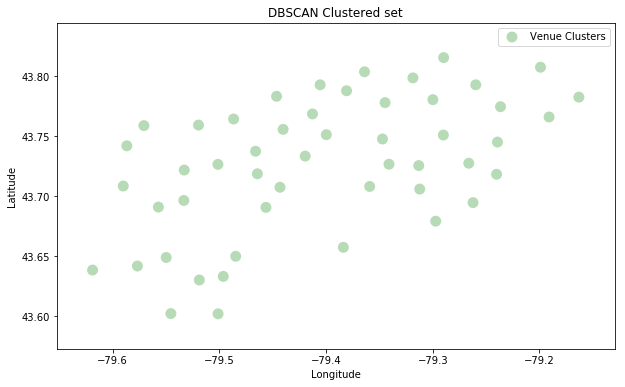

In [112]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rep_points['lon'], rep_points['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
ax.set_title('DBSCAN Clustered set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([rs_scatter], ['Venue Clusters'], loc='upper right')
plt.show()

# 6 Create final map and overlay DBSCAN clusters

In [113]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(rep_points['lat'], rep_points['lon'], rs['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto